# Step-1 Importing libraries 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the dataframe

In [15]:
add_to_cart = pd.read_csv('Zomato data .csv')
add_to_cart

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [16]:
# Questions to solve

# a) What type of restaurant do the majority of customers order from ?

In [17]:
add_to_cart.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

# Now the very first issue we are facing is the format of rating column. We just need rate column in single number not by 5.

In [18]:
def handle_rating(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

add_to_cart['rate'] = add_to_cart['rate'].apply(handle_rating)
add_to_cart


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [19]:
add_to_cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Types of restaurants 

Text(0, 0.5, 'Count (number of people)')

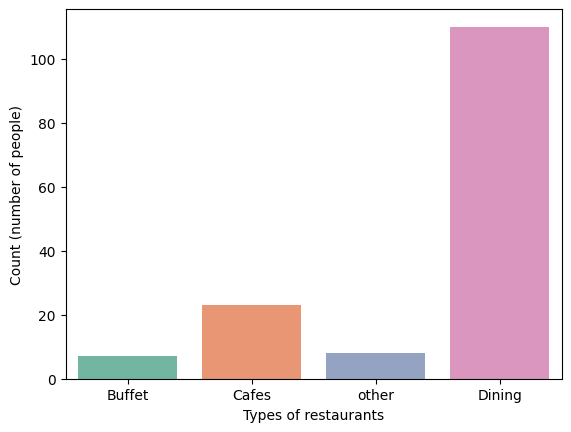

In [20]:
sns.countplot(x=add_to_cart['listed_in(type)'], hue=add_to_cart['listed_in(type)'],palette = 'Set2')
plt.xlabel('Types of restaurants')
plt.ylabel("Count (number of people)")

# Conclusion - Majority of the restaurants are fall into 'Dinning' category.

## Question b) - How many votes has each type of restaurant received from customers

In [21]:
#pd.crosstab(car_sales['Make'] , car_sales['Doors'])

In [25]:
add_to_cart

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [23]:
pd.crosstab( add_to_cart['listed_in(type)'],add_to_cart['votes'])

votes,0,4,6,7,8,9,10,11,13,14,...,804,808,868,918,1047,1647,1720,2556,4401,4884
listed_in(type),,,,,,,,,,,,,,,,,,,,,
Buffet,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Cafes,0,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
Dining,33,1,2,2,3,2,1,1,1,1,...,1,1,1,0,1,1,1,0,1,0
other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Text(0, 0.5, 'Votes')

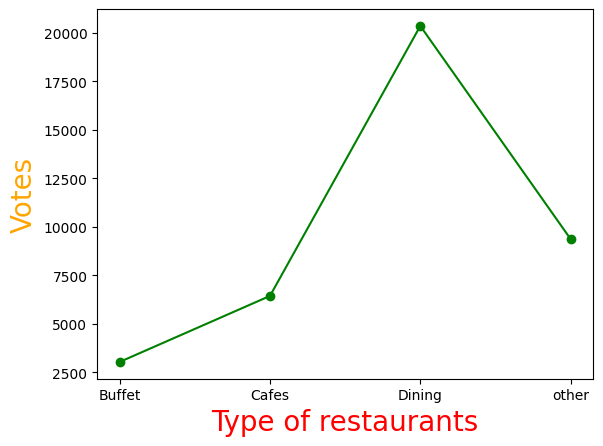

In [24]:
grouped_data = add_to_cart.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c = 'green',marker = "o")
plt.xlabel("Type of restaurants",c='red',size=20)
plt.ylabel("Votes",c='Orange',size=20)

# Conclusion - Majority of the votes are given to the 'Dinning' type restaurant.

# Question c) - What are the ratings that majority of the restaurants have received ?

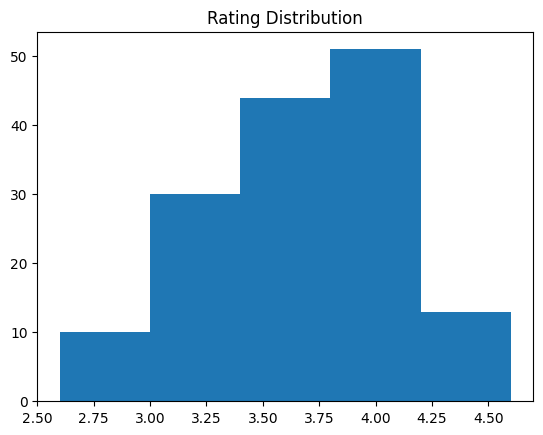

In [13]:
plt.hist(add_to_cart['rate'],bins = 5)
plt.title('Rating Distribution')
plt.show()

# Conclusion -Majority of the restaurants received the rating in the range of 3.5-4

## Question d) - Zomato has observed that most couples order food online. What is their average spending on each order?

In [79]:
add_to_cart.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [80]:
add_to_cart['approx_cost(for two people)'].mean()

418.2432432432432

In [ ]:
##sns.countplot(x=add_to_cart['listed_in(type)'], hue=add_to_cart['listed_in(type)'],palette = 'Set2')
#plt.xlabel('Types of restaurants')


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_39532\3753685194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = couple_data,palette = 'Set2')


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

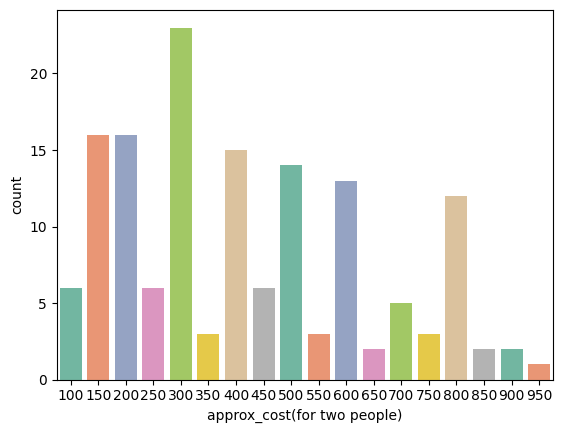

In [96]:
couple_data = add_to_cart['approx_cost(for two people)']
sns.countplot(x = couple_data,palette = 'Set2') 

# Conlusion - Average spend on each order is 300

# Question e) - Which mode has received the maximum rating ?

In [98]:
add_to_cart.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_39532\1183206662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order',y='rate', data = add_to_cart,palette='Set2')


<Axes: xlabel='online_order', ylabel='rate'>

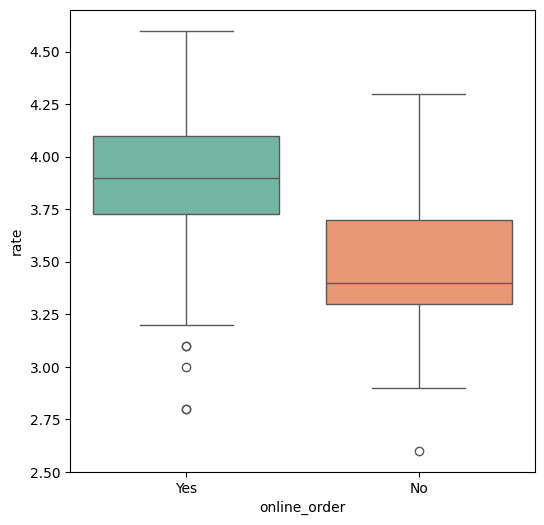

In [100]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data = add_to_cart,palette='Set2')


# Conclusion - Online order received more rating than offline mode

# Question f) Which type of restaurants received more offline orders so that zomato can pull customers with some good offers

In [101]:
add_to_cart.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


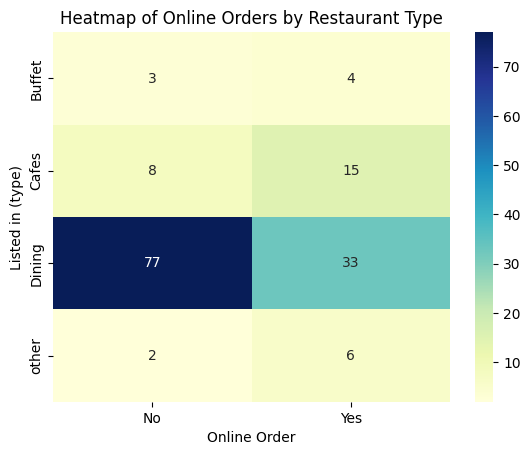

In [105]:
# Correct the pivot_table syntax
pivot_table = pd.pivot_table(add_to_cart, index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plotting the heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Online Orders by Restaurant Type")
plt.xlabel('Online Order')
plt.ylabel('Listed in (type)')
plt.show()